In [5]:
import pandas as pd
import matplotlib as mp
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [6]:
df=pd.read_csv("air.csv")

In [7]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.time  
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
df['DayOfWeek'] = df['Date'].dt.dayofweek  
df['Month'] = df['Date'].dt.month  


In [8]:
df=df.replace(-200,np.nan)

In [9]:
num_cols = ['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'T', 'RH', 'AH', 'NMHC(GT)']
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)

REMOVING OUTLINERS USING IQR METHOD

In [17]:
df.fillna({col: round(df[col].median(), 2) for col in ['CO(GT)', 'NOx(GT)', 'NO2(GT)']}, inplace=True)

In [18]:
df.fillna({col: round(df[col].median(), 2) for col in ['T', 'RH', 'AH']}, inplace=True)

In [19]:
knn_imputer = KNNImputer(n_neighbors=5)
df.iloc[:, 2:] = knn_imputer.fit_transform(df.iloc[:, 2:])

KNN imputer is used as it helps us find the missing values at a better accuracy

In [20]:

scaler = StandardScaler()
df.iloc[:, 2:] = scaler.fit_transform(df.iloc[:, 2:]).astype(np.float64) 



STANDARDISATION 

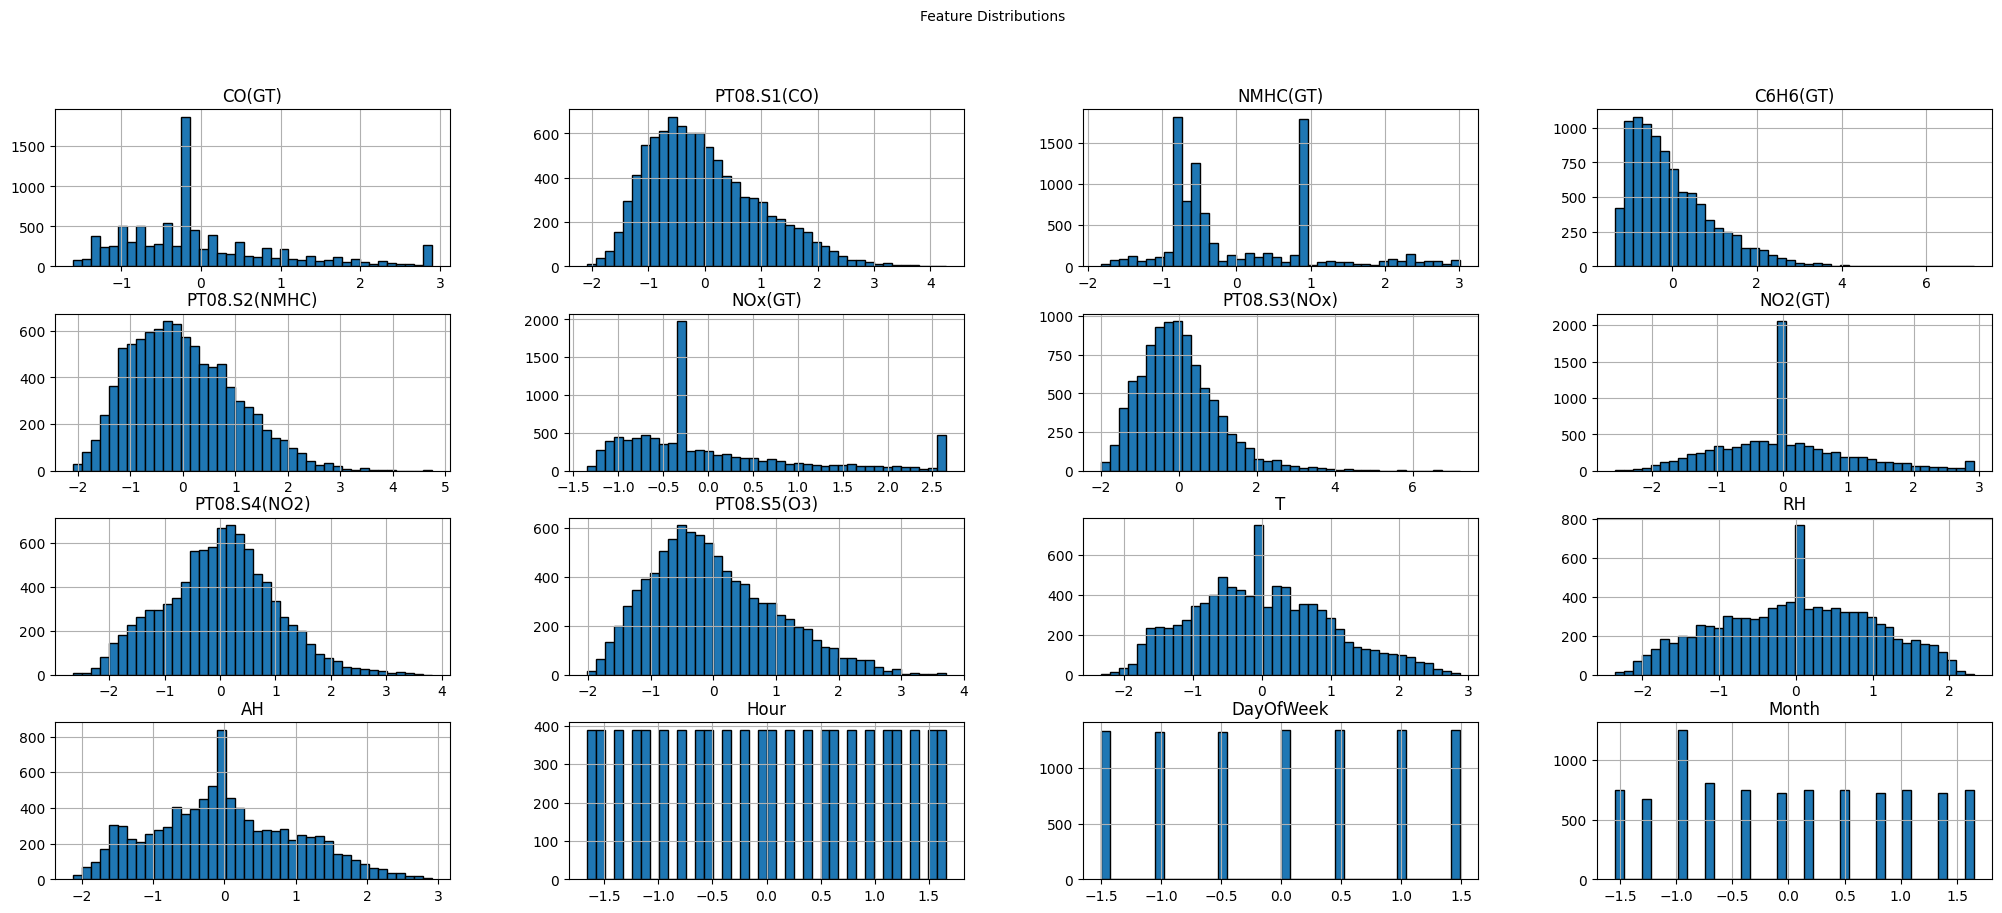

In [22]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv(r"scaled_air.csv")


df.hist(figsize=(25,10), bins=40, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=10)
plt.show()



HISTOGRAM